Enter mass of M1: 15
Enter mass of M2: 20
Enter mass of M3: 30
Enter friction coefficient for M1: 4
Enter friction coefficient for M2: 5
Enter friction coefficient for M3: 6
Enter rope length L: 7
Enter time step dt: 12
Enter total time: 30


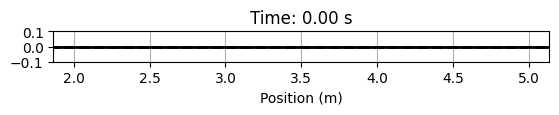

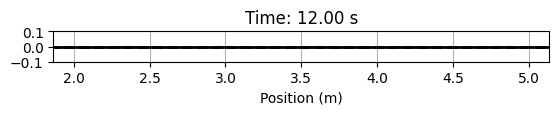

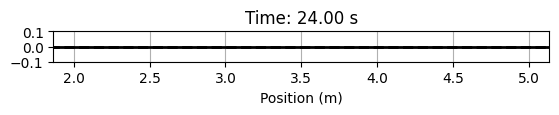

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def compute_acceleration(M1, M2, M3, mu1, mu2, mu3, L):
    g = 9.81  # acceleration due to gravity (m/s^2)
    a1 = g * (mu1 - mu2) / (1 + mu1)
    a2 = g * (mu2 - mu3) / (1 + mu2)
    a3 = g * mu3 / (1 + mu3)
    return a1, a2, a3

def compute_max_distance(M1, M2, M3, mu1, mu2, mu3, L):
    g = 9.81  # acceleration due to gravity (m/s^2)
    D_max = (M2 / M1) * L * (mu1 - mu2) / (mu1 + 1)
    return D_max

def visualize_motion(M1, M2, M3, mu1, mu2, mu3, L, dt, total_time):
    g = 9.81  # acceleration due to gravity (m/s^2)
    a1, a2, a3 = compute_acceleration(M1, M2, M3, mu1, mu2, mu3, L)
    D_max = compute_max_distance(M1, M2, M3, mu1, mu2, mu3, L)

    t = np.arange(0, total_time, dt)
    v2 = 0  # initial velocity of M2
    x2 = L  # initial position of M2
    x3 = 0   # initial position of M3
    x1 = 0   # initial position of M1
    v1 = 0   # initial velocity of M1

    for i in range(len(t)):
        # Update velocity and position of M1
        v1 += a1 * dt
        x1 += v1 * dt

        # Update velocity and position of M2
        if x2 >= 0:
            v2 += a2 * dt
            x2 -= v2 * dt
        else:
            v2 -= a2 * dt
            x2 -= v2 * dt

        # Update position of M3
        x3 += v2 * dt

        # Plotting
        plt.clf()
        plt.plot([0, x2], [0, 0], 'k-', linewidth=2)  # Rope
        plt.plot([x2, x3], [0, 0], 'k--', linewidth=2)  # Ground
        plt.plot(x1, 0, 'bo', markersize=10)  # M1
        if v2 >= 0:
            plt.plot(x2, 0, 'ro', markersize=10)  # M2 moving right
        else:
            plt.plot(x2, 0, 'wo', markersize=10)  # M2 moving left
        plt.plot(x3, 0, 'go', markersize=10)  # M3
        plt.xlim(-D_max, L + D_max)
        plt.ylim(-0.1, 0.1)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.title(f"Time: {t[i]:.2f} s")
        plt.xlabel("Position (m)")
        plt.grid(True)
        plt.pause(0.01)

# Input parameters
M1 = float(input("Enter mass of M1: "))
M2 = float(input("Enter mass of M2: "))
M3 = float(input("Enter mass of M3: "))
mu1 = float(input("Enter friction coefficient for M1: "))
mu2 = float(input("Enter friction coefficient for M2: "))
mu3 = float(input("Enter friction coefficient for M3: "))
L = float(input("Enter rope length L: "))
dt = float(input("Enter time step dt: "))
total_time = float(input("Enter total time: "))

# Visualize motion
visualize_motion(M1, M2, M3, mu1, mu2, mu3, L, dt, total_time)
